# **Binary Classification using Logistic Regression on Heart Data Set**

# *Description*:

**Goal**: Build a Binary Classification Model to predict whether or not an individual has heart disease

**Methodology**: weigh 13 attributes using logistic regression 

**Attributes**:

-- 1. age

-- 2. sex

-- 3. chest pain type (4 values)

-- 4. resting blood pressure

-- 5. serum cholestoral in mg/dl

-- 6. fasting blood sugar > 120 mg/dl

-- 7. resting electrocardiographic results (values 0,1,2)

-- 8. maximum heart rate achieved

-- 9. exercise induced angina

-- 10. oldpeak = ST depression induced by exercise relative to rest

-- 11. the slope of the peak exercise ST segment

-- 12. number of major vessels (0-3) colored by flourosopy

-- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


# **Data Import and Cleaning**

In [ ]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data Set**


In [ ]:
#import files to google colab
from google.colab import files
uploaded = files.upload()

Saving heart_alt.txt to heart_alt.txt


In [ ]:
import io

# assign temporary field values before for data cleaning
# I'll assign some temporary field names to the dataframe while I clean and import the data
# the data contains some NaN values pushing the the last field into a new column, so I assigned 15 temporary field names
tempfields = range(15)

# altered read_csv command for google colab
data = pd.read_csv(io.BytesIO(uploaded['heart_alt.txt']), sep = " ", names = tempfields)

**Data Cleaning**

In [ ]:
#change male values to 1 and female values to 0 use for calculations in modeling 
for i in range(data.shape[0]):
  if data.loc[i, 1] == 'M':
    data.loc[i, 1] = 1
  else:
    data.loc[i, 1] = 0  

In [ ]:
#formatting data for manipulation

data_val = data.values
data_val = np.delete(data_val, 14, 1)
data_val = data_val.reshape((-1, 14))
data = pd.DataFrame(data_val, columns = range(0, 14))
data.columns = ['Sex', 'Age', 'chest pain type', 'resting blood pressure', 'serum cholesterol', 'fasting blood sugar', 'resting ECG results', 
                 'Maximum Heart Rate', 'exercise induced angina', 'ST depressioninduced by exercise', 'slope of peak ST segment', 'number of vessels in flouroscopy',
                 'thal', 'Heart Disease Present']

# **Method 1: Manual Calculations**

In [ ]:
#I'm predicting the last field of the data set (presence of Heart disease) so I'll split up my set into X and Y
Y = data_val[:, 13]
X = np.delete(data_val, 13, axis = 1)

In [ ]:
# now I'll look at the amount of instances and features present
N = data_val.shape[0]
D = data_val.shape[1]
N, D

# change values from 1s and 2s to 0s and 1s in Y to line up well with booleans
for i in range(N):
  if Y[i] == 2:
    Y[i] = 1
  else:
    Y[i] = 0

Y = Y[np.newaxis].T

In [ ]:
# append bias value of ones to data
bias = np.ones(N)[np.newaxis].T
X = np.append(bias, X, axis = 1)

In [ ]:
#feature scaling so does not impact weights
def featurescale(X, N, D):
  means = np.zeros(D)
  stds = np.zeros(D)
  for i in range(D):
    means[i] = np.mean(X[:, i])
    stds[i]= np.std(X[:, i])

  for j in range(1, D):
    for i in range(N):
      X[i, j] = (X[i, j] - means[j])/(stds[j])

featurescale(X, N, D)

In [ ]:
#random initialized weights
weights = np.ones(D).astype(np.float128)
#weights = weights.astype(np.float)
X = X.astype(np.float)

In [ ]:
#sigmoid and predictions
def sig(X, weights):
   sig = 1/(1 + np.exp(X.dot(weights)))
   #predict = np.round(sig)
   return sig
  
predictions = sig(X, weights)
np.mean(Y == predictions)

0.0

In [ ]:
#cross entropy error
def CEE(predictions, target, N):
  Error = 0
  for i in range(N):
    Error -= target[i]*np.log(predictions[i]) +(1 - target[i])*np.log(1 - predictions[i])
  
  return Error

In [ ]:
#corrected dimensions needed for GD
predictions = predictions[np.newaxis].T
weights = np.ones(D)[np.newaxis]

In [ ]:
#gradient descent
weights = weights.astype(np.float128)
X = X.astype(np.float128)
predictions = predictions.astype(np.float128)
Y = Y.astype(np.float128)

#data split for training a test set
train_num =  int(N*0.7)
X_train = X[0:train_num, :]
X_test = X[train_num:, :]
Y_train = Y[0:train_num, :]
Y_test = Y[train_num:, :]
predictions_train = predictions[0:train_num, :]

In [ ]:
# copies for GD algorithm
weights_log = np.copy(weights)
predictions_log = np.copy(predictions)
predictions_log_train = np.copy(predictions_train)

In [ ]:
#gradient descent

lr = 0.001 #learning rate
CEE_track = []

for i in range(200):
  #weights += lr * X.T.dot(Y - predictions)
  weights_log += lr * (np.dot((predictions_log_train - Y_train).T, X_train)- weights_log)
  predictions_log_train = sig(X_train, weights_log.T)

  #append to CEE
  cee_loop = CEE(predictions_log_train, Y_train, train_num)
  CEE_track.append(cee_loop)

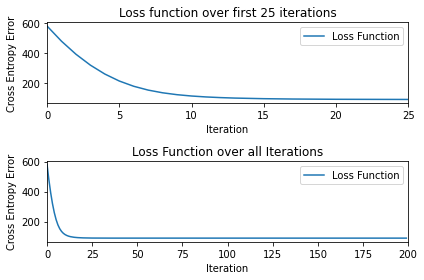

In [ ]:

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1)

# First 25 iteraitons of CEE
ax1.plot(CEE_track, label = "Loss Function")
ax1.set(title='Loss function over first 25 iterations')
ax1.legend(loc = "upper right")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Cross Entropy Error")
ax1.set_xlim([0, 25])

# all iterations of CEE
ax2.plot(CEE_track, label = "Loss Function")
ax2.set(title='Loss Function over all Iterations')
ax2.legend(loc = "upper right")
ax2.set_ylabel("Cross Entropy Error")
ax2.set_xlabel("Iteration")
ax2.set_xlim([0, 200])

fig.tight_layout()
plt.show()

In [ ]:
weights_log #view predicted constants

array([[ 0.06340529, -0.03960847, -0.15817665, -0.18332014, -0.07448198,
        -0.04202169,  0.00819592, -0.06041704,  0.15478747, -0.1391298 ,
        -0.16572114, -0.10346826, -0.24106226, -0.23390219]],
      dtype=float128)

In [ ]:
# try test data
predictions_test = sig(X_test, weights_log.T)

In [ ]:
pred_tr = np.round(predictions_test)

In [ ]:
# accuracy measurement
np.mean(Y_test == pred_tr)

0.8395061728395061

In [ ]:
pred_tr == Y_test

In [ ]:
pred_r = np.round(predictions_log_train) 

In [ ]:
np.mean(Y_train == pred_r)

0.8412698412698413

# **Method 2: Scikit-Learn Libraries**

In [ ]:
#import ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#split up training and test set
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X, Y, test_size=0.3, random_state=101)

In [ ]:
# define logistic regression with max iterations
logmodel = LogisticRegression(max_iter = 200)

In [ ]:
#change to 1d arrays for sklearn libraries
y_train_sk_1d = y_train_sk.ravel()
y_train_sk_1d=y_train_sk_1d.astype('int')

#run log regression
logmodel.fit(X_train_sk, y_train_sk_1d)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# test predictions
predictions_sk = logmodel.predict(X_test_sk)
predictions_sk=predictions_sk.astype('int')

In [ ]:
from sklearn.metrics import classification_report
y_test_sk = y_test_sk.astype('int')
print(classification_report(y_test_sk, predictions_sk))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.89      0.80      0.84        40

    accuracy                           0.85        81
   macro avg       0.86      0.85      0.85        81
weighted avg       0.86      0.85      0.85        81



In [ ]:
# get confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_sk, predictions_sk)

array([[37,  4],
       [ 8, 32]])

In [ ]:
#more false positives than false negatives, probably better to have more false positives than false negatives for heart disease

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test_sk, predictions_sk))

In [ ]:
rmse # want 0.2 to 0.5 so 0.385 is good

0.3849001794597505

In [ ]:
# brier score: the closer to 0 the better
from sklearn.metrics import brier_score_loss
brier = brier_score_loss(y_test_sk, predictions_sk)
brier

0.14814814814814814

# **Method 3: Tensorflow and Scikit-Learn**

In [ ]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
#use sklearn to split data again
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X, Y, test_size=0.3, random_state=101)

In [ ]:
#using keras in tensorflow
tf_model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#compile model
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

# Train the model
X_train_tf = X_train_tf.astype(np.float32)
X_test_tf = X_test_tf.astype(np.float32)
y_test_tf = y_test_tf.astype(np.float32)
y_train_tf = y_train_tf.astype(np.float32)
log_fit_tf = tf_model.fit(X_train_tf, y_train_tf, validation_data=(X_test_tf, y_test_tf), epochs=300)


# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", tf_model.evaluate(X_train_tf, y_train_tf))
print("Test score:", tf_model.evaluate(X_test_tf, y_test_tf))

Epoch 1/300
6/6 [==============================] - 0s 26ms/step - loss: 1.3301 - accuracy: 0.2751 - val_loss: 1.4583 - val_accuracy: 0.1975
Epoch 2/300
6/6 [==============================] - 0s 5ms/step - loss: 1.3131 - accuracy: 0.2751 - val_loss: 1.4372 - val_accuracy: 0.1975
Epoch 3/300
6/6 [==============================] - 0s 5ms/step - loss: 1.2959 - accuracy: 0.2751 - val_loss: 1.4168 - val_accuracy: 0.1975
Epoch 4/300
6/6 [==============================] - 0s 6ms/step - loss: 1.2784 - accuracy: 0.2804 - val_loss: 1.3966 - val_accuracy: 0.1975
Epoch 5/300
6/6 [==============================] - 0s 5ms/step - loss: 1.2614 - accuracy: 0.2910 - val_loss: 1.3764 - val_accuracy: 0.2099
Epoch 6/300
6/6 [==============================] - 0s 5ms/step - loss: 1.2446 - accuracy: 0.2857 - val_loss: 1.3562 - val_accuracy: 0.2099
Epoch 7/300
6/6 [==============================] - 0s 5ms/step - loss: 1.2277 - accuracy: 0.2910 - val_loss: 1.3364 - val_accuracy: 0.2099
Epoch 8/300
6/6 [=========

In [ ]:
#finding best fit iteration
def bestfit(loss, val_loss):
  diff = []
  for i in range(len(loss)):
    diff.append(abs(loss[i] - val_loss[i]))
    
  diff = np.asarray(diff)
  return diff.argmin()

best_iteration = bestfit(loss, val_loss)
best_iteration

153

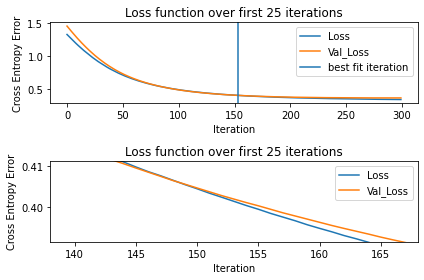

In [ ]:
# Create figure
fig, (ax3, ax4) = plt.subplots(2, 1)
loss = log_fit_tf.history['loss']
val_loss = log_fit_tf.history['val_loss']

# log y axis
ax3.plot(loss, label = 'Loss')
ax3.plot(val_loss, label = 'Val_Loss')
ax3.axvline(best_iteration, label='best fit iteration')
ax3.legend(loc="upper right")
ax3.set(title='All Epochs to see best fit iteration')
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Cross Entropy Error")
#ax3.set_xlim([0, 25])

# log x axis
ax4.plot(loss, label = 'Loss')
ax4.plot(val_loss, label = 'Val_Loss')
ax4.legend(loc="upper right")
ax4.set(title='Separation between val_loss and Loss')
ax4.set_ylabel("Cross Entropy Error")
ax4.set_xlabel("Iteration")
ax4.set_xlim([best_iteration - 15, best_iteration + 15])
ax4.set_ylim([loss[best_iteration] - 0.01, loss[best_iteration] + 0.01])

fig.tight_layout()
plt.show()